# Score vs N

In this notebook we plot the score, # of tests, # of FPs and # of FNs for several values of N. 

In [1]:
import os
os.chdir("../")

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# plt.style.use('default')
import seaborn as sns
import glob
import json
from src import utils
import matplotlib.pyplot as plt

sns.set_theme(context='paper', style='dark', font_scale=1)

In [7]:
name="score_vs_N"
type_dict = {
    'N' : int, 
    'false_negatives' : int,
    'false_positives' : int,
    'k' : float,
    'lambda_1' : float,
    'lambda_2' : float,
    'method' : str,
    'num_of_infected' : int,
    'num_of_tests' : int,
    'group_size' : float,
    'r' : float,
    'score' : float,
    'se' : float,
    'sp' : float,
    'seed' : int
}
marker_dict = {
    'Dorfman' : 's',
    'Individual' : 'o',
    'Neg.Bin.' : 'D'
}

In [4]:
files = glob.glob("./outputs/{name}_*.json".format(name=name))

data = []
for fl_id, fl in enumerate(files):
    with open(fl,"r") as f:
        df = pd.DataFrame.from_records(json.load(f), index=[fl_id])
        data.append(df)

input_df = pd.concat(data)

In [10]:
total_df = input_df.astype(type_dict) # Fix types
total_df = total_df.rename(columns={"method": "Method", "score": "Score"}) # Rename columns
total_df = total_df.replace({'dorfman': 'Dorfman', 'individual': 'Individual', 'negbin': 'Neg.Bin.'}) # Rename methods

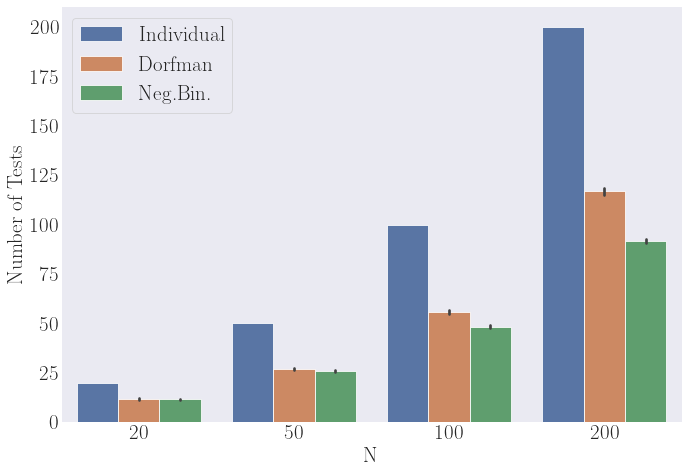

In [66]:
utils.latexify(fig_width=10, fig_height=7, font_scale=3)
FN_df = total_df[(total_df['lambda_1']==0.0) & (total_df['lambda_2']==0.0) & (total_df['N']>=20)]

g = sns.catplot(
    data=FN_df, kind="bar",
    x="N", y="Score", hue="Method", legend=False,
    ci=95, palette="deep", height=7, aspect=10/7, hue_order=['Individual', 'Dorfman', 'Neg.Bin.'])

g.set_ylabels('Number of Tests')
g.fig.get_axes()[0].legend(loc='upper left')

plt.tight_layout()
plt.savefig('figures/{name}_tests.pdf'.format(name=name))

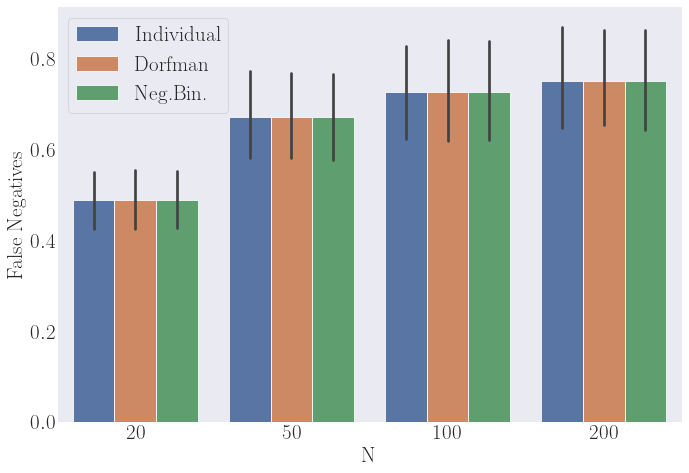

In [67]:
utils.latexify(fig_width=10, fig_height=7, font_scale=3)
FN_df = total_df[(total_df['lambda_1']==1.0) & (total_df['lambda_2']==0.0) & (total_df['N']>=20)]

g = sns.catplot(
    data=FN_df, kind="bar",
    x="N", y="Score", hue="Method", legend=False,
    ci=95, palette="deep", height=7, aspect=10/7, hue_order=['Individual', 'Dorfman', 'Neg.Bin.'])

g.set_ylabels('False Negatives')
g.fig.get_axes()[0].legend(loc='upper left')

plt.tight_layout()
plt.savefig('figures/{name}_FNs.pdf'.format(name=name))

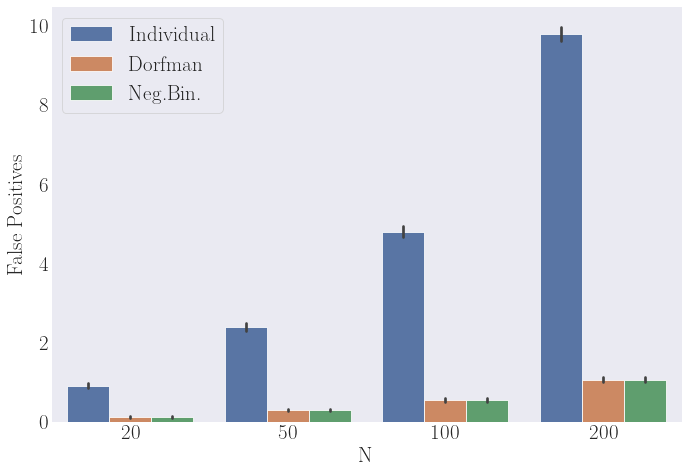

In [68]:
utils.latexify(fig_width=10, fig_height=7, font_scale=3)
FN_df = total_df[(total_df['lambda_1']==0.0) & (total_df['lambda_2']==1.0) & (total_df['N']>=20)]

g = sns.catplot(
    data=FN_df, kind="bar",
    x="N", y="Score", hue="Method", legend=False,
    ci=95, palette="deep", height=7, aspect=10/7, hue_order=['Individual', 'Dorfman', 'Neg.Bin.'])

g.set_ylabels('False Positives')
g.fig.get_axes()[0].legend(loc='upper left')

plt.tight_layout()
plt.savefig('figures/{name}_FPs.pdf'.format(name=name))